In [164]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math, copy

In [165]:
data = pd.read_csv('data1.txt', sep=",", header=None)
X_train = data.iloc[0:, 0:2].to_numpy()
y_train = data.iloc[0:, 2].to_numpy()
data

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


In [166]:
def sigmoid(z) :
    g = 1 / (1 + np.exp(-z))
    return g

In [167]:
def compute_cost(X, y, w, b) :
    m, n = X.shape
    loss_sum = 0.
    for i in range(m) :
        z_wb = 0
        for j in range(n) :
            z_wb_ij = w[j] * X[i, j]
            z_wb += z_wb_ij
        z_wb += b
        f_wb = sigmoid(z_wb)
        loss = -y[i] * np.log(f_wb) - (1 - y[i]) * np.log(1 - f_wb)
        loss_sum += loss
    total_cost = loss_sum / m
    return total_cost

In [168]:
def compute_gradient(X, y, w, b) :
    m, n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.
    for i in range(m) :
        z_wb = 0
        for j in range(n) :
            z_wb += w[j] * X[i, j]
        z_wb += b
        f_wb = sigmoid(z_wb)
        for j in range(n) :
            dj_dw[j] += (f_wb - y[i]) * X[i, j]
        dj_db += f_wb - y[i]
    dj_dw /= m
    dj_db /= m
    return dj_db, dj_dw

In [169]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters) :
    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    for i in range(num_iters) :
        dj_db, dj_dw = gradient_function(X, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        if i < 100000 :
            J_history.append(cost_function(X, y, w, b))
        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}")
    return w, b, J_history

In [170]:
def predict(X, w, b) :
    m, n = X.shape   
    p = np.zeros(m)
    
    for i in range(m):   
        z_wb = 0

        for j in range(n): 
            z_wb += w[j] * X[i, j]
        z_wb += b
        f_wb = sigmoid(z_wb)
        p[i] = f_wb >= 0.5
    return p

In [171]:
np.random.seed(1)
intial_w = 0.01 * (np.random.rand(2).reshape(-1,1) - 0.5)
initial_b = -8
iterations = 10000
alpha = 0.001

w,b, J_history = gradient_descent(X_train ,y_train, initial_w, initial_b, 
                                   compute_cost, compute_gradient, alpha, iterations)

Iteration    0: Cost     1.01
Iteration 1000: Cost     0.31
Iteration 2000: Cost     0.30
Iteration 3000: Cost     0.30
Iteration 4000: Cost     0.30
Iteration 5000: Cost     0.30
Iteration 6000: Cost     0.30
Iteration 7000: Cost     0.30
Iteration 8000: Cost     0.30
Iteration 9000: Cost     0.30


In [172]:
p = predict(X_train, w,b)
print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))

Train Accuracy: 92.000000


In [173]:
# more feature!
def mapFeature(X1, X2, degree = 6) :
    if X1.ndim > 0 :
        out = [np.ones(X1.shape[0])]
    else :
        out = [np.ones(1)]
    for i in range(1, degree + 1) :
        for j in range(i+1) :
            out.append((X1 ** (i-j)) * (X2 ** j))
    if X1.ndim > 0 :
        return np.stack(out, axis = 1)
    else :
        return np.array(out)

In [174]:
# decision boundary
def decision_boundary(w, b, X, y) :
    theta = np.array([b, w[0], w[1]])
    if X.shape[1] <= 3 :
        plot_x = np.array([np.min(X[:, 1]) - 2 , np.max(X[:, 1]) + 2])
        plot_y = (-1. / theta[2]) * (theta[1] * plot_x + theta[0])
        plt.plot(plot_x, plot_y)
        plt.legend(['Admitted', 'Not admitted', 'Decision Boundary'])
        plt.xlim([30, 100])
        plt.ylim([30, 100])
    else :
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)
        z = np.zeros((u.size, v.size))
    
        for i, ui in enumerate(u):
            for j, vj in enumerate(v):
                z[i, j] = np.dot(mapFeature(ui, vj), theta)

        z = z.T  
        plt.contour(u, v, z, levels=[0], linewidths=2, colors='g')
        plt.contourf(u, v, z, levels=[np.min(z), 0, np.max(z)], cmap='Greens', alpha=0.4)
    plt.scatter(X_train[:,0], X_train[:,1], c=y_train)

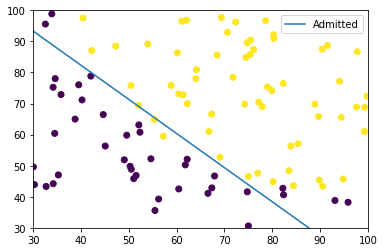

In [175]:
# plot decision boundary
decision_boundary(w, b, X_train, y_train)